In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import pickle
import numpy as np

In [2]:
file_path = '506_anon_fall2023_no_duplicates.csv'
df = pd.read_csv(file_path)
cols = len(df.columns)
prefType = 'LinNorm' # 'Exp', 'Lin', 'LinNorm'

In [3]:
df.columns

Index(['Are you interested in being a Team Representative? ',
       'd580f6fedb5a7e8e112798ba7215c376', 'd544872a7a31ad80d4ec06d2ab3c106b',
       'aed5a51831f1e9b3ea1d17ba844d32cd', 'd8576d770bc1e39ea2fec0dfef9c88a9',
       '9c7028fd2f6e7005972bf543a45b2e06', 'a1ef38fb26b1b81ea66f46b5dc3e10c7',
       '1ed3ddcaa6fab66fdd8673d0de207c3c', '5ce679da3f7693e797ab5fc5b5fb5ccd',
       '058754028b379782720a5f1f2d3e5311', '889e7cf1f694a813051e599ade1a90e0',
       'f51e4de107872409c4486cd4881297fb', '21a0065e54f798bad719b2afe776f71c',
       'e93be764a63e55196107e7e2ab6e957b', '2b61e0b345dbfadd1a49bd03b7b789c6',
       'id name', 'email anonymized', 'anonymized group preference'],
      dtype='object')

In [4]:
numOfProjects = 8
columns_to_drop = ['id name']
df_dropped_multiple = df.drop(columns=columns_to_drop)

# If you want to modify the DataFrame in place, use inplace=True
df.drop(columns=columns_to_drop, inplace=True)


column_name_mapping = {
    df.columns[0]: 'representative',
    df.columns[-2]: 'id',
    df.columns[-1]: 'friends'  
}

for i in range(1, numOfProjects+1):
    column_name_mapping[df.columns[i]] = df.columns[i]+'A'
    
for i in range(numOfProjects + 1, numOfProjects + 7):
    column_name_mapping[df.columns[i]] = f'time{i - numOfProjects}'

df.rename(columns=column_name_mapping, inplace=True)

In [5]:
df.columns

Index(['representative', 'd580f6fedb5a7e8e112798ba7215c376A',
       'd544872a7a31ad80d4ec06d2ab3c106bA',
       'aed5a51831f1e9b3ea1d17ba844d32cdA',
       'd8576d770bc1e39ea2fec0dfef9c88a9A',
       '9c7028fd2f6e7005972bf543a45b2e06A',
       'a1ef38fb26b1b81ea66f46b5dc3e10c7A',
       '1ed3ddcaa6fab66fdd8673d0de207c3cA',
       '5ce679da3f7693e797ab5fc5b5fb5ccdA', 'time1', 'time2', 'time3', 'time4',
       'time5', 'time6', 'id', 'friends'],
      dtype='object')

In [6]:
df['representative'].astype(str)
df['representative'] = df['representative'].map({'No': 0, 'Maybe': 1, 'Yes': 1})
df = df.drop_duplicates(subset='id')
for i in range(1, 7):
    df[f'time{i}'] = df[f'time{i}'].apply(lambda x: 0 if len(x) < 20 else 1) # 0 if not available, otherwise 1

In [7]:
n = df.shape[0]
print(f'num of rows = {n}')

num of rows = 165


In [8]:
# Add teams for the same project
def replicate_projects(projects, k):
    letters = ['B', 'C', 'D', 'E', 'F', 'G']
    for p in projects:
        root_proj = p + 'A'
        for i in range(k-1):
            df[p+letters[i]] = df[root_proj]
            
uniqueProjects = [p[:-1] for p in list(df.columns[1:numOfProjects+1])]
replicate_projects(uniqueProjects, 6)

In [9]:
df.columns

Index(['representative', 'd580f6fedb5a7e8e112798ba7215c376A',
       'd544872a7a31ad80d4ec06d2ab3c106bA',
       'aed5a51831f1e9b3ea1d17ba844d32cdA',
       'd8576d770bc1e39ea2fec0dfef9c88a9A',
       '9c7028fd2f6e7005972bf543a45b2e06A',
       'a1ef38fb26b1b81ea66f46b5dc3e10c7A',
       '1ed3ddcaa6fab66fdd8673d0de207c3cA',
       '5ce679da3f7693e797ab5fc5b5fb5ccdA', 'time1', 'time2', 'time3', 'time4',
       'time5', 'time6', 'id', 'friends', 'd580f6fedb5a7e8e112798ba7215c376B',
       'd580f6fedb5a7e8e112798ba7215c376C',
       'd580f6fedb5a7e8e112798ba7215c376D',
       'd580f6fedb5a7e8e112798ba7215c376E',
       'd580f6fedb5a7e8e112798ba7215c376F',
       'd544872a7a31ad80d4ec06d2ab3c106bB',
       'd544872a7a31ad80d4ec06d2ab3c106bC',
       'd544872a7a31ad80d4ec06d2ab3c106bD',
       'd544872a7a31ad80d4ec06d2ab3c106bE',
       'd544872a7a31ad80d4ec06d2ab3c106bF',
       'aed5a51831f1e9b3ea1d17ba844d32cdB',
       'aed5a51831f1e9b3ea1d17ba844d32cdC',
       'aed5a51831f1e9b3ea1d17b

In [10]:
columns = sorted([col for col in list(df.columns) if col not in ['friends', 'representative', 'id', 'time1', 'time2', 'time3', 'time4',
       'time5', 'time6']])
columns += ['time1', 'time2', 'time3', 'time4', 'time5', 'time6', 'id', 'representative', 'friends']
df = df[columns]
df.columns

Index(['1ed3ddcaa6fab66fdd8673d0de207c3cA',
       '1ed3ddcaa6fab66fdd8673d0de207c3cB',
       '1ed3ddcaa6fab66fdd8673d0de207c3cC',
       '1ed3ddcaa6fab66fdd8673d0de207c3cD',
       '1ed3ddcaa6fab66fdd8673d0de207c3cE',
       '1ed3ddcaa6fab66fdd8673d0de207c3cF',
       '5ce679da3f7693e797ab5fc5b5fb5ccdA',
       '5ce679da3f7693e797ab5fc5b5fb5ccdB',
       '5ce679da3f7693e797ab5fc5b5fb5ccdC',
       '5ce679da3f7693e797ab5fc5b5fb5ccdD',
       '5ce679da3f7693e797ab5fc5b5fb5ccdE',
       '5ce679da3f7693e797ab5fc5b5fb5ccdF',
       '9c7028fd2f6e7005972bf543a45b2e06A',
       '9c7028fd2f6e7005972bf543a45b2e06B',
       '9c7028fd2f6e7005972bf543a45b2e06C',
       '9c7028fd2f6e7005972bf543a45b2e06D',
       '9c7028fd2f6e7005972bf543a45b2e06E',
       '9c7028fd2f6e7005972bf543a45b2e06F',
       'a1ef38fb26b1b81ea66f46b5dc3e10c7A',
       'a1ef38fb26b1b81ea66f46b5dc3e10c7B',
       'a1ef38fb26b1b81ea66f46b5dc3e10c7C',
       'a1ef38fb26b1b81ea66f46b5dc3e10c7D',
       'a1ef38fb26b1b81ea66f46b5

In [11]:
numOfUniqueProjects = 8
numOfReplicatedProjects = len(df.columns) - 6 - 3
print(f'# replicated projects = {numOfReplicatedProjects}')
projects = list(df.columns[:numOfReplicatedProjects])

# replicated projects = 48


In [12]:
c = dict()
G = nx.Graph()
nodes = [u for u in list(df['id'])]
assignment = dict()
representatives = dict()
times = dict()
for index, row in df.iterrows():
    id = str(row['id'])
    preferences = [int(row[p][:-2]) for p in projects]
    for p, pref in zip(projects, preferences):
        if prefType == 'Exp':
            c[(id, p)] = 1 / pref
        elif prefType == 'Lin':
            c[(id, p)] = (numOfUniqueProjects - pref + 1)
        elif prefType == 'LinNorm':
            c[(id, p)] = (numOfUniqueProjects - pref + 1) / numOfUniqueProjects
    
    # friends
    friends = row['friends'].strip("[]").replace("'", "").split(",")
#     for f in friends:
#         if f and not f.isspace():
#             G.add_edge(id, f[-5:])
            
    # represenatitive
    representatives[id] = row['representative']
    
    # available times
    times[id] = np.array([row['time1'], row['time2'], row['time3'], row['time4'], row['time5'], row['time6']])

w = dict()
# G.add_nodes_from(nodes)
# G_c = nx.complement(G)
# for e in G_c.edges:
#     w[e] = 0.001
# edges = list(G_c.edges)
# len(edges)

In [13]:
G_c = nx.Graph()
G_c.add_nodes_from(nodes)
for u in G_c.nodes:
    for v in G_c.nodes:
        if u < v and np.dot(times[u], times[v]) == 0: # no common lab time
            G_c.add_edge(u, v)
edges = list(G_c.edges)
print(len(edges))
print(len(G_c.nodes))
for e in G_c.edges:
    if e not in w:
        w[e] = 1

1629
165


In [14]:
duplicates = df[df['id'].duplicated()]['id']
duplicates

Series([], Name: id, dtype: object)

In [15]:
# print(f"number of unique students = {len(G.nodes)}")
# print(f'number of (friends) edges = {len(G.edges)}')
print(f'number of conflict edges (time conflicts) = {len(G_c.edges)}')

number of conflict edges (time conflicts) = 1629


In [16]:
max_capacities = dict()
for p in projects:
    max_capacities[p] = 5

In [17]:
original_emails = list(df['id'])

In [18]:
with open(f'./cs506_{prefType}.pickle', 'wb') as file:
    pickle.dump(projects, file) # project names
    pickle.dump(max_capacities, file) # max capacity for each project
    pickle.dump(c, file) # project preferences
    pickle.dump(w, file) # weights of conflict edges
    pickle.dump(nodes, file) # nodes of G_c
    pickle.dump(edges, file) # conflict edges
    pickle.dump(representatives, file) # representatives
    pickle.dump(original_emails, file) # email column of csv input
    file.close()

In [19]:
projects

['1ed3ddcaa6fab66fdd8673d0de207c3cA',
 '1ed3ddcaa6fab66fdd8673d0de207c3cB',
 '1ed3ddcaa6fab66fdd8673d0de207c3cC',
 '1ed3ddcaa6fab66fdd8673d0de207c3cD',
 '1ed3ddcaa6fab66fdd8673d0de207c3cE',
 '1ed3ddcaa6fab66fdd8673d0de207c3cF',
 '5ce679da3f7693e797ab5fc5b5fb5ccdA',
 '5ce679da3f7693e797ab5fc5b5fb5ccdB',
 '5ce679da3f7693e797ab5fc5b5fb5ccdC',
 '5ce679da3f7693e797ab5fc5b5fb5ccdD',
 '5ce679da3f7693e797ab5fc5b5fb5ccdE',
 '5ce679da3f7693e797ab5fc5b5fb5ccdF',
 '9c7028fd2f6e7005972bf543a45b2e06A',
 '9c7028fd2f6e7005972bf543a45b2e06B',
 '9c7028fd2f6e7005972bf543a45b2e06C',
 '9c7028fd2f6e7005972bf543a45b2e06D',
 '9c7028fd2f6e7005972bf543a45b2e06E',
 '9c7028fd2f6e7005972bf543a45b2e06F',
 'a1ef38fb26b1b81ea66f46b5dc3e10c7A',
 'a1ef38fb26b1b81ea66f46b5dc3e10c7B',
 'a1ef38fb26b1b81ea66f46b5dc3e10c7C',
 'a1ef38fb26b1b81ea66f46b5dc3e10c7D',
 'a1ef38fb26b1b81ea66f46b5dc3e10c7E',
 'a1ef38fb26b1b81ea66f46b5dc3e10c7F',
 'aed5a51831f1e9b3ea1d17ba844d32cdA',
 'aed5a51831f1e9b3ea1d17ba844d32cdB',
 'aed5a51831

In [20]:
len(edges)

1629

In [21]:
len(G_c.nodes)

165

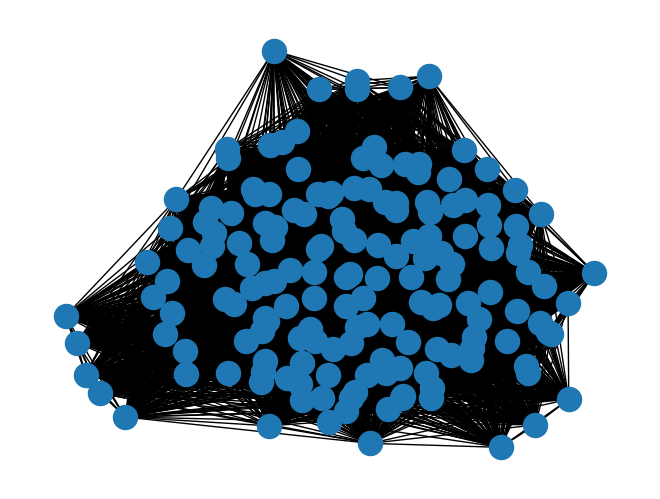

In [23]:
G = nx.complement(G_c)
nx.draw(G, pos=nx.spring_layout(G))